In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/657A3part2

/content/drive/My Drive/657A3part2


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
fea = []
for i in range(1,785):
  fea.append(str(i))
X = pd.read_csv('train.csv', usecols = fea)
y = pd.read_csv('train.csv', usecols= ['Label'])

In [0]:
print(X.head)

<bound method NDFrame.head of        1  2  3  4  5  6  7  8  9  ...  776  777  778  779  780  781  782  783  784
0      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
1      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
2      0  0  0  0  0  0  0  0  1  ...    9    0    0    0    0    0    0    0    0
3      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
4      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
...   .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
59995  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59996  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59997  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59998  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59999  0  0  0  0  0  0  0  0  0  ...    0    0    0    0

In [0]:
print(y.head)

<bound method NDFrame.head of        Label
0          4
1          0
2          0
3          4
4          1
...      ...
59995      3
59996      0
59997      4
59998      0
59999      2

[60000 rows x 1 columns]>


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1,random_state = 42)

In [0]:
X_train =np.array(X_train, dtype ='float32')
X_test =np.array(X_test,dtype ='float32')
y_train =np.array(y_train,dtype ='float32')
y_test =np.array(y_test,dtype ='float32')

0.0

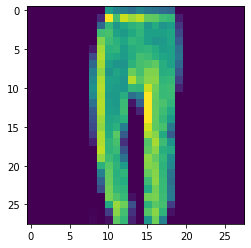

In [0]:
import random
i=random.randint(1,54000)
plt.imshow(X_train[i,:].reshape(28,28))
label=y_train[i,0]
label

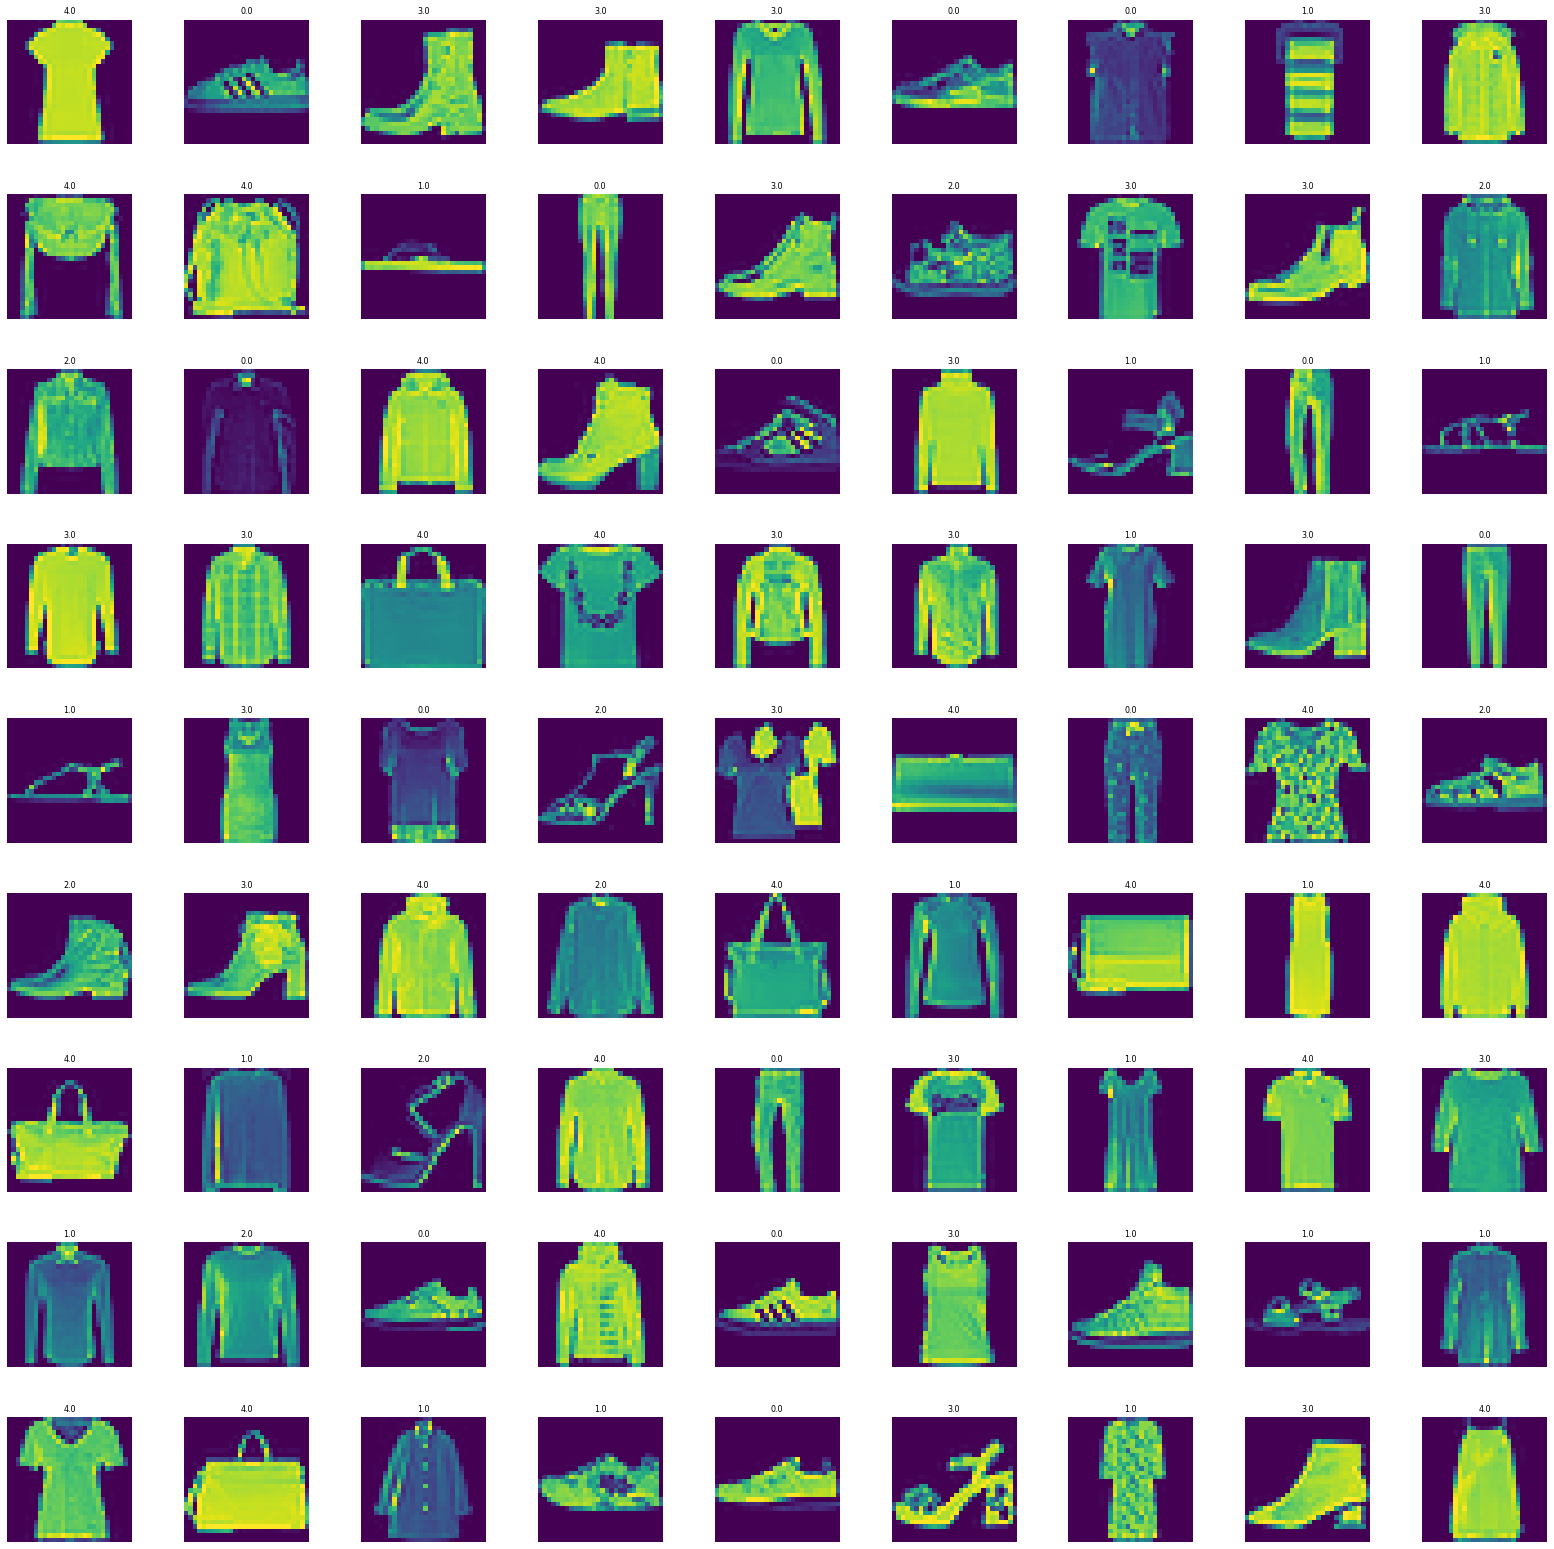

In [0]:
w_grid=9
l_grid=9
fig,axes = plt.subplots(l_grid,w_grid,figsize=(28,28))
axes = axes.ravel()
length = len(X_train)
for i in np.arange(0,w_grid*l_grid): #create evenly spaces variables
    #select a random number
    
    index = np.random.randint(0,length)
    # read and disply and images with the selectd index
    axes[i].imshow(X_train[index,:].reshape((28,28)))
    axes[i].set_title(y_train[index,0],fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [0]:
X_train =X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
#X_vali = X_vali.reshape(X_vali.shape[0],*(28,28,1))
X_train=X_train[:,:]/255
X_test= X_test[:,:]/255

In [0]:
X_train.shape

(54000, 28, 28, 1)

In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization, Activation, add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model

In [0]:
def ResNet(x):
  x = Conv2D(16, (5, 5), activation='relu', padding='same', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  shortcut1 = x
  x = Conv2D(32, (5, 5),activation='relu', padding='same',kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (5, 5),padding='same',kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)
  x = add([shortcut1, x])
  x = Activation('relu')(x)
  x = Conv2D(64, (1, 1),activation='relu',padding='same',kernel_initializer='uniform')(x)
  shortcut2 = x
  x = Conv2D(64, (5, 5),activation='relu', padding='same',kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (5, 5),padding='same',kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)
  x = add([shortcut2, x])
  x = Activation('relu')(x)
  x = Flatten()(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.25)(x)
  return x

In [0]:
inputs = Input(shape=(28,28,1))
x = ResNet(inputs)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs, predictions)
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics =['accuracy'])  

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
model.fit(X_train,
          y_train,
          batch_size= 1024,
          epochs=400,
          verbose=1,
          validation_data=(X_test,y_test))

Epoch 1/400
53/53 [==============================] - 7s 139ms/step - loss: 0.8293 - accuracy: 0.6563 - val_loss: 1.6408 - val_accuracy: 0.1983
Epoch 2/400
53/53 [==============================] - 6s 110ms/step - loss: 0.4893 - accuracy: 0.8027 - val_loss: 1.6781 - val_accuracy: 0.2050
Epoch 3/400
53/53 [==============================] - 6s 111ms/step - loss: 0.4098 - accuracy: 0.8358 - val_loss: 1.7077 - val_accuracy: 0.2050
Epoch 4/400
53/53 [==============================] - 6s 112ms/step - loss: 0.3673 - accuracy: 0.8533 - val_loss: 1.8033 - val_accuracy: 0.2050
Epoch 5/400
53/53 [==============================] - 6s 112ms/step - loss: 0.3297 - accuracy: 0.8705 - val_loss: 1.8284 - val_accuracy: 0.2050
Epoch 6/400
53/53 [==============================] - 6s 113ms/step - loss: 0.3029 - accuracy: 0.8810 - val_loss: 1.8531 - val_accuracy: 0.2050
Epoch 7/400
53/53 [==============================] - 6s 114ms/step - loss: 0.2798 - accuracy: 0.8896 - val_loss: 1.9645 - val_accuracy: 0.2242

In [0]:
evaluation=model.evaluate(X_test,y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

188/188 [==============================] - 1s 3ms/step - loss: 1.0238 - accuracy: 0.8698
Test Accuracy:0.870


In [0]:
test_fea = [str(i) for i in range(0,784)]
X_test_t = pd.read_csv('testX.csv', usecols=test_fea)

In [0]:
X_test_t =np.array(X_test_t, dtype ='float32')

In [0]:
X_test_t = X_test_t.reshape(X_test_t.shape[0],*(28,28,1))
X_test_t = X_test_t/255.0

In [0]:
X_test_t.shape

(10000, 28, 28, 1)

In [0]:
pred_test = model.predict_classes(X_test_t)


In [0]:
pred_test

array([3, 4, 1, ..., 3, 1, 2])

In [0]:
id = [i for i in range(0,10000)]
frame = pd.DataFrame(id, columns=['Id'])

In [0]:
frame['Label'] = pred_test

In [0]:
frame

,Id,Label
0,0,3
1,1,4
2,2,1
3,3,1
4,4,3
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,1


In [0]:
frame.to_csv(r'submission.csv', index = False)

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
ls

 23A_INVOICE_LTTS_Feb_Tax.pdf
'Colab Notebooks'/
'DataB works.ipynb'
'ECE 750 - Final New.gdoc'
'ECE 750 - Final Project Report.gdoc'
'ECE 750.gdoc'
'ECE 750 Lecture 17.gdoc'
 Experiments.gdoc
'Fabricated A5 work.gsheet'
 fer2013/
'Full page photo1.gdoc'
'Full page photo1.pdf'
'Innovation, Science and Economic Development (1).gslides'
'Innovation, Science and Economic Development (1).pptx'
'Innovation, Science and Economic Development.gslides'
'Innovation, Science and Economic Development.pptx'
'KD-BBR-worksheet2 update.docx'
'KD-BBR-worksheet2 update.gdoc'
 model.h5
 model.json
' my copy a2 Q1 color basic- 4 March.ipynb'
 output.png
 raw_1.docx
'Research Presentation Raw.gslides'
'Resume_Rishi Shah_Rev01.docx'
'Rishi-Dhwani Day 1(Makarpura).gsheet'
'Rishi-Dhwani Day 1(Makarpura).xlsx'
 Smit_Resume.docx
 Smit_Resume.gdoc
 submission.csv
 Testing.gdoc
 testX.csv
 train.csv
'Untitled document.gdoc'
'Wine Quality.gdoc'


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions submit -c ece657a-w20-asg3-part2 -f submission.csv -m "First Submission"

100% 67.3k/67.3k [00:00<00:00, 258kB/s]
Successfully submitted to ECE 657A Assignment 3 Part 2